In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
DATADIR = "E:/finalyear/MusicAppRuwinika/Dataset/01/test"
CATEGORIES = ["angry", "neutral","happy", "sad","surprised"]

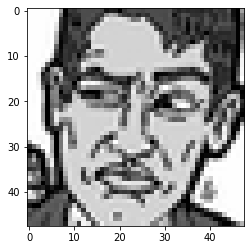

In [3]:
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  #

        break  
    break  

In [4]:
print(img_array.shape)

(48, 48)


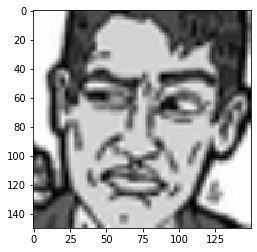

In [5]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

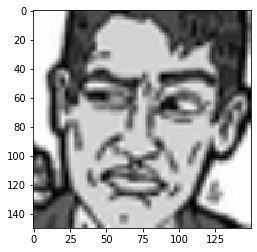

In [6]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
training_data = []
def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num]) 
            except Exception as e: 
                pass
create_training_data()
print(len(training_data))

100%|██████████| 831/831 [00:05<00:00, 163.09it/s]

10390


In [8]:
import random

random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
3
0
4
4
1
1
2


In [10]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 52]
   [ 52]
   [ 47]
   ...
   [196]
   [195]
   [195]]

  [[ 52]
   [ 52]
   [ 47]
   ...
   [196]
   [195]
   [195]]

  [[ 46]
   [ 46]
   [ 44]
   ...
   [193]
   [193]
   [193]]

  ...

  [[168]
   [168]
   [162]
   ...
   [222]
   [222]
   [222]]

  [[158]
   [158]
   [155]
   ...
   [221]
   [221]
   [221]]

  [[158]
   [158]
   [155]
   ...
   [221]
   [221]
   [221]]]]


In [11]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

In [13]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=5, validation_split=0.3)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 7272 samples, validate on 3118 samples
Epoch 1/5
7272/7272 [==============================] - 1511s 208ms/sample - loss: -651598763.4600 - acc: 0.4960 - val_loss: -3803244506.5606 - val_acc: 0.4901
Epoch 2/5
7272/7272 [==============================] - 1383s 190ms/sample - loss: -28932352795.8812 - acc: 0.4961 - val_loss: -81537256507.7717 - val_acc: 0.4901
Epoch 3/5
7272/7272 [==============================] - 1351s 186ms/sample - loss: -217886535414.1430 - acc: 0.4961 - val_loss: -437415993275.6895 - val_acc: 0.4901
Epoch 4/5
7272/7272 [==============================] - 1353s 186ms/sample - loss: -822383631599.9473 - acc: 0.4961 - val_loss: -1377075433810.9250 - val_acc: 0.4901
Epoch 5/5
7272/7272 [==============================] - 1350s 186ms/sample - loss: -2158042827353.5576 - acc: 0.4961 - val_loss:

In [14]:
from tensorflow.keras.callbacks import TensorBoard

In [15]:
NAME = "Face-CNN"
tensorboard = TensorBoard(log_dir="E:/finalyear/MusicAppRuwinika/Dataset/01/test".format(NAME))

In [16]:
model.fit(X, y,
          batch_size=32,
          epochs=3,
          validation_split=0.3)

Train on 7272 samples, validate on 3118 samples
Epoch 1/3
7272/7272 [==============================] - 1371s 188ms/sample - loss: -4567774505858.9570 - acc: 0.4961 - val_loss: -6399219082356.2588 - val_acc: 0.4901
Epoch 2/3
7272/7272 [==============================] - 1430s 197ms/sample - loss: -8434329117005.4473 - acc: 0.4961 - val_loss: -11216989493178.3750 - val_acc: 0.4901
Epoch 3/3
7272/7272 [==============================] - 1541s 212ms/sample - loss: -14094041207392.3164 - acc: 0.4961 - val_loss: -18042780941684.4219 - val_acc: 0.4901


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

In [18]:
NAME = "Face-CNN"

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

model.fit(X, y,
          batch_size=32,
          epochs=10,
          validation_split=0.3)


Train on 7272 samples, validate on 3118 samples
Epoch 1/10
7272/7272 [==============================] - 209s 29ms/sample - loss: -22591527.8643 - acc: 0.4963 - val_loss: -138584834.0629 - val_acc: 0.4901
Epoch 2/10
7272/7272 [==============================] - 212s 29ms/sample - loss: -1051736909.6062 - acc: 0.4961 - val_loss: -3011316015.1276 - val_acc: 0.4901
Epoch 3/10
7272/7272 [==============================] - 209s 29ms/sample - loss: -8169886052.8229 - acc: 0.4961 - val_loss: -16357107951.7434 - val_acc: 0.4901
Epoch 4/10
7272/7272 [==============================] - 209s 29ms/sample - loss: -30465107374.3278 - acc: 0.4961 - val_loss: -50917496118.6812 - val_acc: 0.4901
Epoch 5/10
7272/7272 [==============================] - 211s 29ms/sample - loss: -80269346867.8196 - acc: 0.4961 - val_loss: -120632463436.1924 - val_acc: 0.4901
Epoch 6/10
7272/7272 [==============================] - 210s 29ms/sample - loss: -171490662726.6887 - acc: 0.4961 - val_loss: -240398853146.9301 - val_acc

In [19]:
import time

dense_layers = [0,1,2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

1-conv-32-nodes-0-dense-1620548190
2-conv-32-nodes-0-dense-1620548190
3-conv-32-nodes-0-dense-1620548190
1-conv-64-nodes-0-dense-1620548190
2-conv-64-nodes-0-dense-1620548190
3-conv-64-nodes-0-dense-1620548190
1-conv-128-nodes-0-dense-1620548190
2-conv-128-nodes-0-dense-1620548190
3-conv-128-nodes-0-dense-1620548190
1-conv-32-nodes-1-dense-1620548190
2-conv-32-nodes-1-dense-1620548190
3-conv-32-nodes-1-dense-1620548190
1-conv-64-nodes-1-dense-1620548190
2-conv-64-nodes-1-dense-1620548190
3-conv-64-nodes-1-dense-1620548190
1-conv-128-nodes-1-dense-1620548190
2-conv-128-nodes-1-dense-1620548190
3-conv-128-nodes-1-dense-1620548190
1-conv-32-nodes-2-dense-1620548190
2-conv-32-nodes-2-dense-1620548190
3-conv-32-nodes-2-dense-1620548190
1-conv-64-nodes-2-dense-1620548190
2-conv-64-nodes-2-dense-1620548190
3-conv-64-nodes-2-dense-1620548190
1-conv-128-nodes-2-dense-1620548190
2-conv-128-nodes-2-dense-1620548190
3-conv-128-nodes-2-dense-1620548190


In [20]:
dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())
            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

1-conv-32-nodes-0-dense-1620548215
2-conv-32-nodes-0-dense-1620548216
3-conv-32-nodes-0-dense-1620548216
1-conv-64-nodes-0-dense-1620548216
2-conv-64-nodes-0-dense-1620548216
3-conv-64-nodes-0-dense-1620548216
1-conv-128-nodes-0-dense-1620548216
2-conv-128-nodes-0-dense-1620548216
3-conv-128-nodes-0-dense-1620548217
1-conv-32-nodes-1-dense-1620548217
2-conv-32-nodes-1-dense-1620548217
3-conv-32-nodes-1-dense-1620548217
1-conv-64-nodes-1-dense-1620548217
2-conv-64-nodes-1-dense-1620548217
3-conv-64-nodes-1-dense-1620548217
1-conv-128-nodes-1-dense-1620548217
2-conv-128-nodes-1-dense-1620548217
3-conv-128-nodes-1-dense-1620548217
1-conv-32-nodes-2-dense-1620548218
2-conv-32-nodes-2-dense-1620548218
3-conv-32-nodes-2-dense-1620548218
1-conv-64-nodes-2-dense-1620548218
2-conv-64-nodes-2-dense-1620548218
3-conv-64-nodes-2-dense-1620548218
1-conv-128-nodes-2-dense-1620548218
2-conv-128-nodes-2-dense-1620548218
3-conv-128-nodes-2-dense-1620548222


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))
 
            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3)

1-conv-32-nodes-0-dense-1620549656
Train on 7272 samples, validate on 3118 samples
Epoch 1/10
7272/7272 [==============================] - 64s 9ms/sample - loss: -19200.9799 - acc: 0.4960 - val_loss: -64117.4911 - val_acc: 0.4901
Epoch 2/10
7272/7272 [==============================] - 64s 9ms/sample - loss: -151486.9752 - acc: 0.4961 - val_loss: -273190.7811 - val_acc: 0.4901
Epoch 3/10
7272/7272 [==============================] - 64s 9ms/sample - loss: -428997.2797 - acc: 0.4961 - val_loss: -628883.4224 - val_acc: 0.4901
Epoch 4/10
7272/7272 [==============================] - 64s 9ms/sample - loss: -839110.0825 - acc: 0.4961 - val_loss: -1113693.4642 - val_acc: 0.4901
Epoch 5/10
7272/7272 [==============================] - 64s 9ms/sample - loss: -1367421.9615 - acc: 0.4961 - val_loss: -1708312.7781 - val_acc: 0.4901
Epoch 6/10
7272/7272 [==============================] - 65s 9ms/sample - loss: -2002997.1898 - acc: 0.4961 - val_loss: -2415844.2162 - val_acc: 0.4901
Epoch 7/10
7272/7272

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

In [24]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))
            
            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3)

model.save('64x3-CNN.model')

3-conv-64-nodes-0-dense-1620629042
Train on 7272 samples, validate on 3118 samples
Epoch 1/10
7272/7272 [==============================] - 392s 54ms/sample - loss: -45456735.9817 - acc: 0.4939 - val_loss: -289801035.9666 - val_acc: 0.4901
Epoch 2/10
7272/7272 [==============================] - 404s 56ms/sample - loss: -2370503690.8427 - acc: 0.4961 - val_loss: -6939724361.5651 - val_acc: 0.4901
Epoch 3/10
7272/7272 [==============================] - 398s 55ms/sample - loss: -19375503143.7096 - acc: 0.4961 - val_loss: -39262028524.7877 - val_acc: 0.4901
Epoch 4/10
7272/7272 [==============================] - 371s 51ms/sample - loss: -72897840800.5281 - acc: 0.4961 - val_loss: -122109878182.6709 - val_acc: 0.4901
Epoch 5/10
7272/7272 [==============================] - 314s 43ms/sample - loss: -192661855571.0803 - acc: 0.4961 - val_loss: -290813643037.0648 - val_acc: 0.4901
Epoch 6/10
7272/7272 [==============================] - 315s 43ms/sample - loss: -411490997805.6238 - acc: 0.4961 - 

In [49]:
import cv2
import tensorflow as tf

CATEGORIES = ["angry","happy","neutral", "sad","surprised"]
def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [50]:
model = tf.keras.models.load_model("64x3-CNN.model")

In [51]:
prediction = model.predict([prepare('E:/Newfolder/b.jpg')])
print(CATEGORIES[int(prediction[0][0])])

happy


In [52]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(150, 150 ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [53]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_115 (Conv2D)          (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_115 (MaxPoolin (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_116 (MaxPoolin (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_117 (MaxPoolin (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_57 (Flatten)         (None, 20736)           